# Python for Dummies
## 1. Axustes lineais e non lineais con `curve_fit`

Como imos traballar con `curve_fit` da exactamente igual que o axuste sexa lienal ou non lineal, simplemente temos que ter o coidado de que os axustes non lineais ás veces esixen poñer uns parámetros iniciais afinados a priori (elaboraremos nisto máis adiante).

Comezamos por importar as tres librerías que imos utilizar:
- `numpy`: Librería enfocada ao cálculo numérico con vectores e matrices en n dimensións. Traballa de xeito moi eficiente, le o programa e logo traballa en C++ cos ndarrays, xa que isto fai que o noso código funcione moito máis rápido. Imos priorizar os numpy arrays sempre sobre as listas.

- `scipy`: Librería enfocada a utilidades científicas, como realizar axustes, resolver ecuacións diferenciais, problemas de optimización...

- `matplotlib`: Librería enfocada ao deseño de gráfica e imaxes por excelencia.

In [20]:
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

Comezamos agora por importar os datos. Tipicamente o máis sinxelo eu creo que é importalos dun arquivo `.txt` ou `.csv`. Pódense importar tamén dun excel, pero a complexidade de facer isto non compensa o pouco que se tarda en pasalos aun arquivo `.txt` por columnas. O arquivo que imos utilizar está subido tamén no git.

In [56]:
nome_data = 'datos_axuste_1.txt' #Aquí poñemos o nome do arquivo

# A r antes dunha string serve para que esta entenda formato LaTeX!
label_x = r'E $[GeV]$'
label_y = r'$\sqrt{\eta}$'

titulo = r'Aqui tamen vale latex $\frac{\Lambda}{\Theta}$'

datos = np.loadtxt(nome_data) #Aquí xa temos o arquivo

#Cal é a diferencia entre nome_data e datos?

print('nome_data é:', nome_data, 'tipo', type(nome_data))
print('datos é:', datos, 'tipo', type(datos))

nome_data é: datos_axuste_1.txt tipo <class 'str'>
datos é: [[ 1.  12.8  1.3]
 [ 2.   6.7  0.7]
 [ 3.   2.5  0.2]
 [ 4.   0.9  0.1]
 [ 5.   2.5  0.3]
 [ 6.   7.8  0.8]
 [ 7.  17.4  1.7]
 [ 8.  31.8  3.2]
 [ 9.  51.7  5.2]
 [10.  77.5  7.8]] tipo <class 'numpy.ndarray'>


En xeral é boa praxe definir todas as cousas, tal e como fixemos arriba, e non logo ir logo poñendo as cousas en plan set_xlabel('Titulo eixo X'). Tampouco nos imos enganar, eu case nunca o fago como tocaría pero bueno xD

Cada fila é unha medida (voume referir a elas como eventos). A primeira columna son os puntos do eixo X, a segunda columna son os puntos do eixo Y, a terceira medida son a incerteza na medida sobre a variable Y (asumimos que a incerteza no eixo X é sempre despreciable ou sistemática).

Agora imos a definir a función a axustar. Neste caso os datos están sacados dun polinomio de orde 3, pero poden ser outras funcións non polinómicas, simplemente usaríamos as funcións de `numpy` como `np.cos()` ou `np.sin()` e `curve_fit` vaino entender.

In [13]:
def funcion_axuste(x, *coefs): #o asterisco (*) indica que non fixamos o número de coeficientes a introducir
    A, B, C, D = coefs
    y = A + B*x + C*x**2 + D*x**3
    # a función podería ser: y = A*np.cos(B*x) + C*np.sin(D*x)
    # ou outro tipo de funcións non lineais de numpy!
    return y

Agora temos que dar uns valores iniciais dos parámetros para que `curve_fit` faga un scan do $\chi^2$ variando estes parámetros iniciais. É interesante afinar a priori, é dicir, se por razóns físicas sabemos que o coeficiente $A$ ten que ser $T_0$ pois podemos poñer de valor inicial do primeiro coeficiente $298K$, por exemplo. Ou se estamos a axustar unha gaussiana é moi interesante poñer o valor da media $\mu$ a priori.

Neste caso como non estamos a axustar variables física vou inicializar os parámetros todos a $1$.

In [14]:
p0 = [1., 1., 1., 1.]

Agora, vamos sacar a forma dos nosos datos, para saber se temos que facer un axuste ponderado (temos acceso ás incertezas dos datos) ou non ponderado (non temos acceso ás incertezas dos datos e `curve_fit` asume unha distribución gaussiana arredor).

In [17]:
F, C = datos.shape

if C==3: #é dicir hai tres columnas en cada evento (X, Y, s(Y))
    x, y, sy = np.split(datos, C, axis = 1)
    tipo     = 'ponderado'
else:
    x, y = np.split(datos, C, axis = 1)
    sy   = np.ones((F,1))
    tipo = 'sen ponderar'

Con isto os están en columna, queremos que estean nunha fila, iso facemolo facilmente:

In [18]:
x  = np.hstack(x)
y  = np.hstack(y)
sy = np.hstack(sy)

E xa estamos listos, a seguinte liña de código é a liña máxica, facemos o axuste nunha (1) sola liña (comeme los huevos Origin).

In [22]:
coef, cov = sco.curve_fit(funcion_axuste, x, y, p0 = p0, sigma = sy, absolute_sigma = True)

E xa está, o axuste está feito, agora imos básicamente facer o plot dos puntos experimentais, a curva axustada e calcular o $\chi^2$. Realmente estas liñas que veñen a continuacón son bastante irrelevantes pero necesarias, todo isto estudase na parte de estatística das técnicas pero, let's be real, who gives a fuck?

In [29]:
NC = len(p0)

y_teo = funcion_axuste(x, *coef)

dif_pon = (y - y_teo)/sy

chi2 = np.sum(dif_pon**2)

syx = (F*chi2/((F-NC)*np.sum(1./sy**2)))**0.5

ym = np.sum(y/sy**2)/np.sum(1./sy**2)

st = np.sum(((y-ym)/sy)**2)

r2 = (st-chi2)/st

E = np.diag(cov)**0.5

if C==2:
    E*=Syx

Agora imos ao que nos interesa, que o programa nos de os resultados do axuste:

In [37]:
print(r'================ Resultados do axuste ================')
print(r'\chi2=',chi2) #O parámetro chi^2 é moito máis interesante que o coeficiente de regresión
print(u'desviación estándar=',syx)
print('coeficiente de regresión=', r2**0.5)
print()
for i in range(NC):
    print( 'A[{0:d}]= {1:f} , sA[{0:d}]= {2:f}'.format(i,coef[i],E[i]))

print( '======================================================')

================ Resultados do axuste ================
\chi2= 0.014808076191942098
desviación estándar= 0.013239371597953303
coeficiente de regresión= 0.9999882208612639

A[0]= 20.572927 , sA[0]= 2.165174
A[1]= -8.226514 , sA[1]= 1.551941
A[2]= 0.449993 , sA[2]= 0.360795
A[3]= 0.094338 , sA[3]= 0.026659


Agora imos facer o plot e xa estaría.

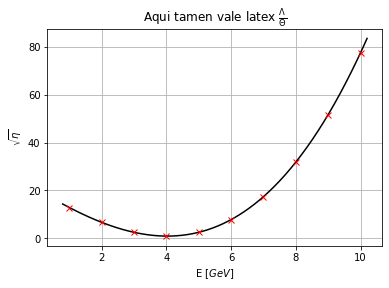

In [57]:
plt.figure()
plt.grid(True)

'''Calculamos e ploteamos a curva'''


xt=np.linspace(x[0]-0.2,x[-1]+0.2,1000) #Aquí eu recomendovos restar un pouco ao primeiro valor e sumar un pouco ao último, queda máis bonito
yt=funcion_axuste(xt,*coef)

plt.plot(xt, yt, 'k-', label = 'Axuste')

'''Ploteamos os puntos experimentais'''

plt.plot(x, y, 'rx', label = 'Puntos Experimentais')

plt.title(titulo)
plt.xlabel(label_x)
plt.ylabel(label_y)
plt.plot()
plt.show()

#se queredes gardar a figura pododes facer plt.savefig('figure.pdf')
#eu normalmente saco unha captura de pantalla

E realmente, con isto xa estaría todo para facer axustes. Deixo debaixo todo o código xunto para que vos sexa máis handy e podades copiar e pegar por se usades `spyder` ou `Visual Studio Code`.

================ Resultados do axuste ================
\chi2= 0.014808076191942098
desviación estándar= 0.013239371597953303
coeficiente de regresión= 0.9999882208612639

A[0]= 20.572927 , sA[0]= 2.165174
A[1]= -8.226514 , sA[1]= 1.551941
A[2]= 0.449993 , sA[2]= 0.360795
A[3]= 0.094338 , sA[3]= 0.026659


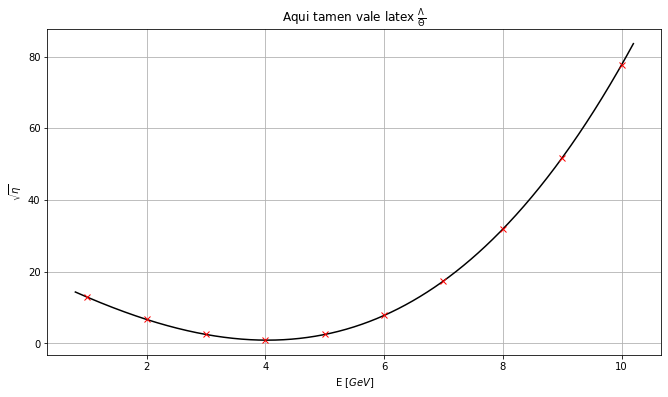

In [63]:
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

nome_data = 'datos_axuste_1.txt'

label_x = r'E $[GeV]$'
label_y = r'$\sqrt{\eta}$'

titulo = r'Aqui tamen vale latex $\frac{\Lambda}{\Theta}$'

datos = np.loadtxt(nome_data)

def funcion_axuste(x, *coefs): #o asterisco (*) indica que non fixamos o número de coeficientes a introducir
    A, B, C, D = coefs
    y = A + B*x + C*x**2 + D*x**3
    # a función podería ser: y = A*np.cos(B*x) + C*np.sin(D*x)
    # ou outro tipo de funcións non lineais de numpy!
    return y

p0 = [1., 1., 1., 1.]

F, C = datos.shape

if C==3: #é dicir hai tres columnas en cada evento (X, Y, s(Y))
    x, y, sy = np.split(datos, C, axis = 1)
    tipo     = 'ponderado'
else:
    x, y = np.split(datos, C, axis = 1)
    sy   = np.ones((F,1))
    tipo = 'sen ponderar'
    
x  = np.hstack(x)
y  = np.hstack(y)
sy = np.hstack(sy)

coef, cov = sco.curve_fit(funcion_axuste, x, y, p0 = p0, sigma = sy, absolute_sigma = True)

NC = len(p0)

y_teo = funcion_axuste(x, *coef)

dif_pon = (y - y_teo)/sy

chi2 = np.sum(dif_pon**2)

syx = (F*chi2/((F-NC)*np.sum(1./sy**2)))**0.5

ym = np.sum(y/sy**2)/np.sum(1./sy**2)

st = np.sum(((y-ym)/sy)**2)

r2 = (st-chi2)/st

E = np.diag(cov)**0.5

if C==2:
    E*=Syx
    
print(r'================ Resultados do axuste ================')
print(r'\chi2=',chi2) 
print(u'desviación estándar=',syx)
print('coeficiente de regresión=', r2**0.5)
print()
for i in range(NC):
    print( 'A[{0:d}]= {1:f} , sA[{0:d}]= {2:f}'.format(i,coef[i],E[i]))

print( '======================================================')

plt.figure(figsize = (11,6))
plt.grid(True)

xt=np.linspace(x[0]-0.2,x[-1]+0.2,1000) #Aquí eu recomendovos restar un pouco ao primeiro valor e sumar un pouco ao último, queda máis bonito
yt=funcion_axuste(xt,*coef)

plt.plot(xt, yt, 'k-', label = 'Axuste')
plt.plot(x, y, 'rx', label = 'Puntos Experimentais')

plt.title(titulo)
plt.xlabel(label_x)
plt.ylabel(label_y)
plt.plot()
plt.show()